In [1]:
from matplotlib import pyplot as plt
import json
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import stumpy
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from collections import Counter
import urllib
import ssl
from tqdm.notebook import tqdm
import io
import os
from kando import kando_client
%run utils.ipynb

In [2]:
df = pd.read_pickle("./gichon_collector.pkl")

In [3]:
df

,PH,EC,ORP,TEMPERATURE,date,weekday,month,hour,point_id,channel_shape,diameter,water_authority,sector
0,6.900,1304.0,-467.0,28.4,2018-09-05 03:05:00,2,9,3,2045,circular_pipe,0.125,24,48
1,6.900,1312.0,-466.0,28.4,2018-09-05 03:10:00,2,9,3,2045,circular_pipe,0.125,24,48
2,6.800,1328.0,-466.0,28.3,2018-09-05 03:15:00,2,9,3,2045,circular_pipe,0.125,24,48
3,6.800,1336.0,-465.0,28.3,2018-09-05 03:20:00,2,9,3,2045,circular_pipe,0.125,24,48
4,6.800,1344.0,-465.0,28.3,2018-09-05 03:25:00,2,9,3,2045,circular_pipe,0.125,24,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003582,1.544,96.0,359.0,23.9,2020-07-05 02:10:00,6,7,2,1332,circular_pipe,0.250,24,48
1003583,1.542,96.0,359.0,23.9,2020-07-05 02:20:00,6,7,2,1332,circular_pipe,0.250,24,48
1003584,1.541,96.0,359.0,24.0,2020-07-05 02:30:00,6,7,2,1332,circular_pipe,0.250,24,48
1003585,1.546,96.0,359.0,24.0,2020-07-05 02:40:00,6,7,2,1332,circular_pipe,0.250,24,48


In [10]:
df[['PH', 'EC', 'ORP', 'TEMPERATURE']]

,PH,EC,ORP,TEMPERATURE
0,6.900,1304.0,-467.0,28.4
1,6.900,1312.0,-466.0,28.4
2,6.800,1328.0,-466.0,28.3
3,6.800,1336.0,-465.0,28.3
4,6.800,1344.0,-465.0,28.3
...,...,...,...,...
1003582,1.544,96.0,359.0,23.9
1003583,1.542,96.0,359.0,23.9
1003584,1.541,96.0,359.0,24.0
1003585,1.546,96.0,359.0,24.0


In [5]:
matrix_profile = stumpy.gpu_stump(df['PH'], m=36, device_id=all_gpu_devices)

NameError: name 'all_gpu_devices' is not defined

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
clf = IsolationForest()

In [18]:
df2 = df[['date', 'PH', 'EC', 'ORP', 'TEMPERATURE']].copy()

In [20]:
df2.dropna(inplace=True)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955972 entries, 0 to 1003586
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         955972 non-null  datetime64[ns]
 1   PH           955972 non-null  float64       
 2   EC           955972 non-null  float64       
 3   ORP          955972 non-null  float64       
 4   TEMPERATURE  955972 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 43.8 MB


In [31]:
y_pred = clf.fit_predict(df2[['PH', 'EC', 'ORP', 'TEMPERATURE']])

In [39]:
y_scores = clf.decision_function(df2[['PH', 'EC', 'ORP', 'TEMPERATURE']])

In [40]:
type(y_scores)

numpy.ndarray

In [41]:
y_scores

array([ 0.06306301,  0.06274072,  0.06381747, ..., -0.17904908,
       -0.17904908, -0.17904908])

In [50]:
len(np.argwhere(y_scores<-0.25))

73

In [62]:
np.argwhere(y_scores<-0.25)

array([[471134],
       [471142],
       [471144],
       [471145],
       [471146],
       [471147],
       [471168],
       [592556],
       [592557],
       [592648],
       [592649],
       [592650],
       [592654],
       [592655],
       [592656],
       [592657],
       [592658],
       [592659],
       [592661],
       [592662],
       [592663],
       [592664],
       [592665],
       [592666],
       [592667],
       [592668],
       [592669],
       [592670],
       [592671],
       [592672],
       [592673],
       [592674],
       [592675],
       [592676],
       [592677],
       [592678],
       [592679],
       [592680],
       [592681],
       [592682],
       [592683],
       [592684],
       [592685],
       [592686],
       [592687],
       [592688],
       [592689],
       [592690],
       [592691],
       [592693],
       [592694],
       [592695],
       [592696],
       [592697],
       [592698],
       [592699],
       [592700],
       [592701],
       [593128

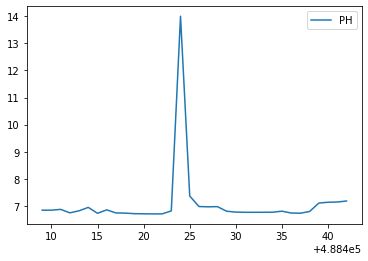

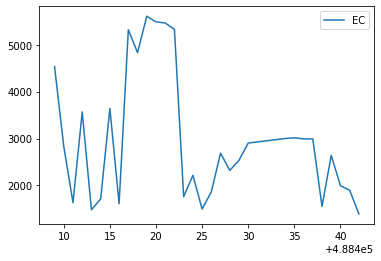

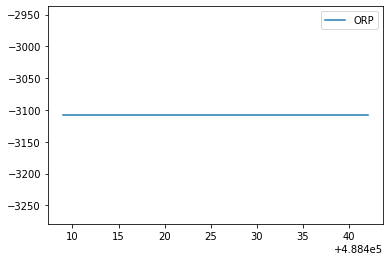

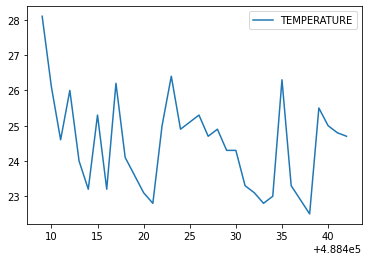

In [79]:
for col in ['PH', 'EC', 'ORP', 'TEMPERATURE']:
    df2[[f'{col}']].iloc[471134:471168].plot()

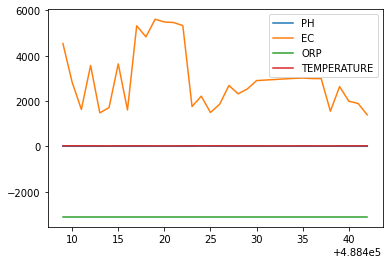

In [77]:
df2[['PH', 'EC', 'ORP', 'TEMPERATURE']].iloc[471134:471168].plot()

In [36]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 97151, 858821]))